<a href="https://colab.research.google.com/github/raz0208/Occlusion-Pedestrian-Detection/blob/main/DATAMININGFINALTERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Libraries

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import random
import cv2
import os
import matplotlib
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

%matplotlib inline

# 2-Read the data

install kaggle

In [2]:
!pip install kaggle

In [3]:
#Upload the Json file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rezaazariaghouieh","key":"64b7017da0efc0f9837d9dc7b0591927"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Download the data from kaggle

In [5]:
#!/bin/bash
!kaggle datasets download shuvoalok/cityscapes

Dataset URL: https://www.kaggle.com/datasets/shuvoalok/cityscapes
License(s): other
100% 199M/199M [00:01<00:00, 103MB/s] 
100% 199M/199M [00:01<00:00, 109MB/s]


In [6]:
# Extract the Zipfile
!unzip /content/cityscapes.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/img/train2754.png  
  inflating: train/img/train2755.png  
  inflating: train/img/train2756.png  
  inflating: train/img/train2757.png  
  inflating: train/img/train2758.png  
  inflating: train/img/train2759.png  
  inflating: train/img/train276.png  
  inflating: train/img/train2760.png  
  inflating: train/img/train2761.png  
  inflating: train/img/train2762.png  
  inflating: train/img/train2763.png  
  inflating: train/img/train2764.png  
  inflating: train/img/train2765.png  
  inflating: train/img/train2766.png  
  inflating: train/img/train2767.png  
  inflating: train/img/train2768.png  
  inflating: train/img/train2769.png  
  inflating: train/img/train277.png  
  inflating: train/img/train2770.png  
  inflating: train/img/train2771.png  
  inflating: train/img/train2772.png  
  inflating: train/img/train2773.png  
  inflating: train/img/train2774.png  
  inflating: train/img/train2775.png  
  inflating: tr

# 3 - Visualization

Showing image: train2648.png
(96, 256, 3)


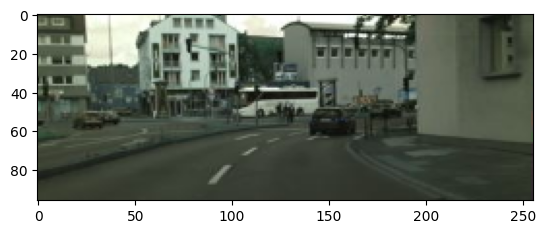

In [7]:
# Set the path to your image folder
img_folder = '/content/train/img'

# List all image files in the directory
img_files = [f for f in os.listdir(img_folder) if f.endswith('.png') or f.endswith('.jpg')]

# Check if img_files is empty
if not img_files:
    print("No image files found in the specified folder.")
else:
    # Randomly choose an image file from the list
    random_img_file = random.choice(img_files)

    # Read and display the randomly chosen image
    img_path = os.path.join(img_folder, random_img_file)
    img = cv2.imread(img_path)
    print(f"Showing image: {random_img_file}")
    print(img.shape)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

Visualize the lables

Showing image: train173.png
(96, 256, 3)


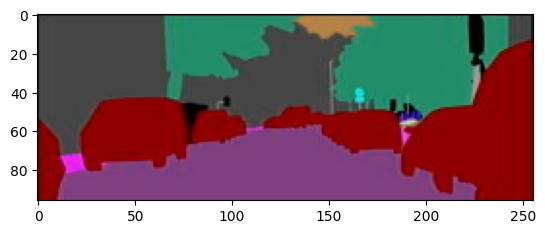

In [8]:
# Set the path to your image folder
label_folder = '/content/train/label'

# List all image files in the directory
label_files = [f for f in os.listdir(label_folder) if f.endswith('.png') or f.endswith('.jpg')]

# Check if label_files is empty
if not label_files:
    print("No image files found in the specified folder.")
else:
    # Randomly choose an image file from the list
    random_label_file = random.choice(label_files)

    # Read and display the randomly chosen image
    label_path = os.path.join(label_folder, random_label_file)
    img = cv2.imread(label_path)
    print(f"Showing image: {random_label_file}")
    print(img.shape)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

Visualize both Original and lable together of Training set

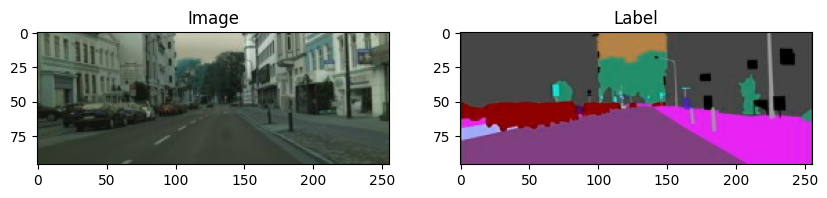

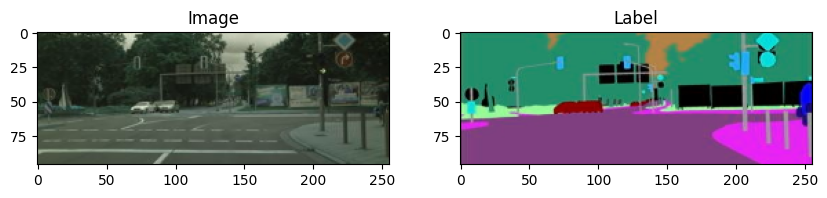

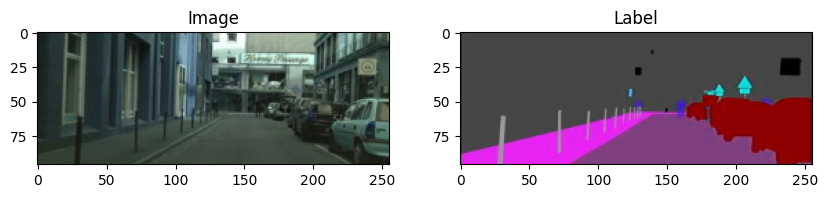

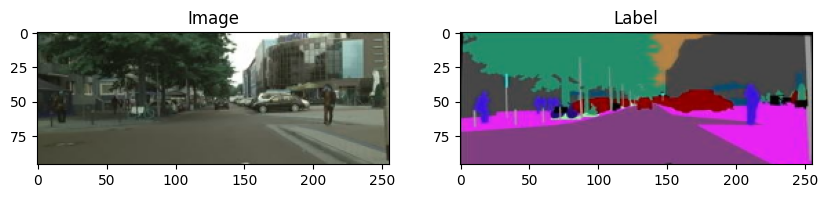

In [9]:
# Directories for images and labels
img_dir = "/content/train/img"
label_dir = "/content/train/label"

# Fetch all image paths
img_paths = [entry.path for entry in os.scandir(img_dir) if entry.is_file()]
label_paths = [entry.path for entry in os.scandir(label_dir) if entry.is_file()]

# Ensure both directories have the same number of files
num_images = min(len(img_paths), len(label_paths))

# Randomly select 4 image-label pairs
selected_indices = random.sample(range(num_images), 4)
selected_img_paths = [img_paths[i] for i in selected_indices]
selected_label_paths = [label_paths[i] for i in selected_indices]

# Display the images and labels
for img_path, label_path in zip(selected_img_paths, selected_label_paths):
    img = cv2.imread(img_path)
    label = cv2.imread(label_path)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct colors
    axes[1].imshow(cv2.cvtColor(label, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Image")
    axes[1].set_title("Label")
    plt.show()

Visualize both Original and lable together of Validation set

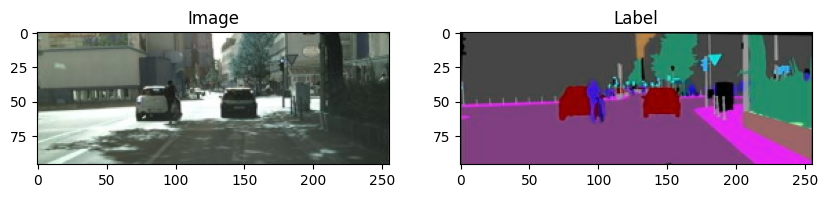

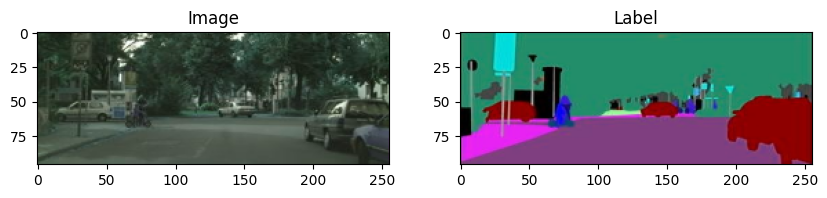

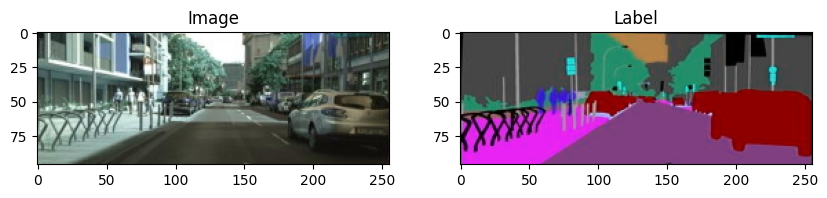

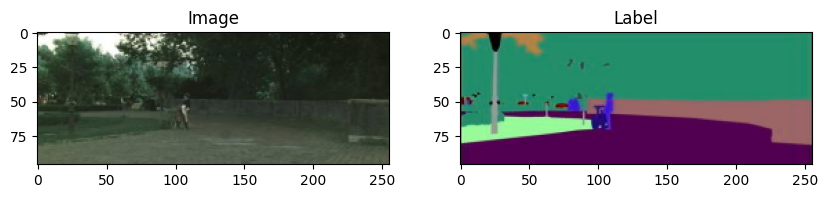

In [10]:
# Directories for images and labels
v_img_dir = "/content/val/img"
v_label_dir = "/content/val/label"

# Fetch all image paths
v_img_paths = [entry.path for entry in os.scandir(v_img_dir) if entry.is_file()]
v_label_paths = [entry.path for entry in os.scandir(v_label_dir) if entry.is_file()]

# Ensure both directories have the same number of files
num_vimages = min(len(v_img_paths), len(v_label_paths))

# Randomly select 4 image-label pairs
selected_indices = random.sample(range(num_vimages), 4)
selected_vimg_paths = [v_img_paths[i] for i in selected_indices]
selected_vlabel_paths = [v_label_paths[i] for i in selected_indices]

# Display the images and labels
for img_path, label_path in zip(selected_vimg_paths, selected_vlabel_paths):
    vimg = cv2.imread(img_path)
    vlabel = cv2.imread(label_path)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(vimg, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct colors
    axes[1].imshow(cv2.cvtColor(vlabel, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Image")
    axes[1].set_title("Label")
    plt.show()

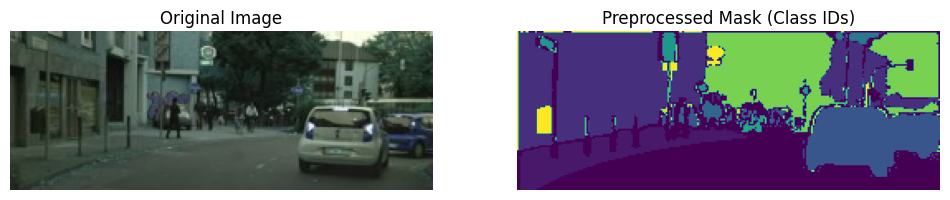

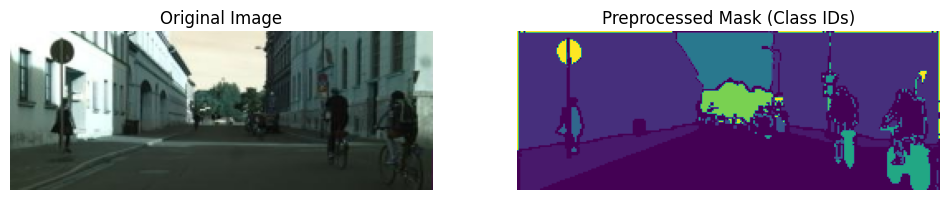

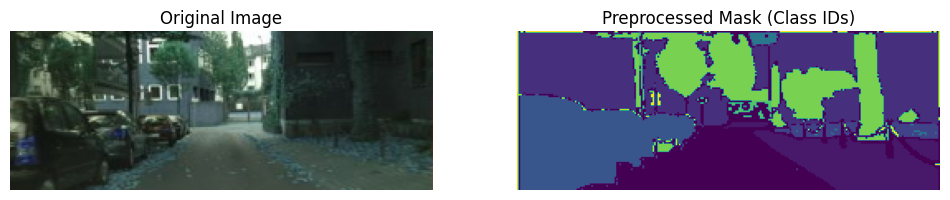

In [16]:
# Define the RGB values and tolerance for each class
color_to_class = {
    (127, 63, 128): 0,     # Road
    (234, 34, 245): 1,     # Sidewalk
    (70, 70, 70): 2,       # Building
    (155, 101, 104): 3,    # Wall
    (142, 0, 0): 4,        # Car
    (50, 19, 217): 5,      # Pedestrian
    (179,130,70): 6,       #Sky
    (232,0,1): 7,          #Rider
    (17,214,224): 8,       #Traffic sign
    (30,11,118): 9,        #biker
    (160,170,250): 10,     #Disable-carpark
    (117,150,166): 11,     #Vertical traffic pipes
    (34,141,106): 12,      #Trees
    (152,250,154): 13,     #Blvd
    (71,1,1): 14,          #Big vehicle
    (0,0,15): 15           #other
}

# Tolerance for color matching
TOLERANCE = 30

# Number of classes
NUM_CLASSES = len(color_to_class)

# Function to load images without resizing
def load_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for consistency
    return img

# Function to convert color-coded mask to class IDs with tolerance
def convert_mask_to_class_ids(mask_path):
    mask = cv2.imread(mask_path)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)  # Convert to RGB for color matching

    # Initialize mask with background (default class 0)
    mask_class = np.zeros((mask.shape[0], mask.shape[1]), dtype=np.int32)

    # Assign each pixel in mask_class to the corresponding class ID based on color within tolerance
    for color, class_id in color_to_class.items():
        lower_bound = np.array([max(c - TOLERANCE, 0) for c in color], dtype=np.uint8)
        upper_bound = np.array([min(c + TOLERANCE, 255) for c in color], dtype=np.uint8)

        # Create a binary mask where pixels within the range are set to 255
        color_mask = cv2.inRange(mask, lower_bound, upper_bound)

        # Apply the class ID to pixels that match the color within tolerance
        mask_class[color_mask > 0] = class_id

    # One-hot encode the mask for the segmentation model
    mask_class = to_categorical(mask_class, num_classes=NUM_CLASSES)
    return mask_class

# Function to display random images and their masks
def display_random_images(selected_img_paths, selected_label_paths):
    random_pairs = list(zip(selected_img_paths, selected_label_paths))
    random.shuffle(random_pairs)
    selected_pairs = random_pairs[:3]

    for img_path, label_path in selected_pairs:
        original_img = load_image(img_path)
        processed_mask = convert_mask_to_class_ids(label_path)  # Preprocessed mask with class IDs

        # Plot original image and the preprocessed mask
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        axes[0].imshow(original_img)
        axes[0].set_title("Original Image")
        axes[1].imshow(np.argmax(processed_mask, axis=-1), cmap="viridis")  # Display classes in preprocessed mask
        axes[1].set_title("Preprocessed Mask (Class IDs)")

        # Hide axes for clean display
        for ax in axes:
            ax.axis("off")
        plt.show()

# Directories for images and labels (modify paths if necessary)
img_folder = '/content/train/img'
label_folder = '/content/train/label'

# Fetch all image paths
img_paths = [entry.path for entry in os.scandir(img_folder) if entry.is_file()]
label_paths = [entry.path for entry in os.scandir(label_folder) if entry.is_file()]

# Ensure both directories have the same number of files
num_images = min(len(img_paths), len(label_paths))

# Randomly select 3 image-label pairs
selected_indices = random.sample(range(num_images), 3)
selected_img_paths = [img_paths[i] for i in selected_indices]
selected_label_paths = [label_paths[i] for i in selected_indices]

# Call the function to display random images
display_random_images(selected_img_paths, selected_label_paths)
